<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">P4 - Anticipez les besoins en consommation de bâtiments</h1>
    <p class="lead">La ville de Seattle souhaite atteindre la neutralité carbone en 2050, dans ce but il nous a été demandé de mettre au point un <a style="color:red">modèle de prédiction </a> des  <b>émissions de CO2 </b> et de la  <b>consommation totale d'énergie</b> de bâtiments non destinés à l’habitation / <b>bâtiments non-résidentiels</b> en se passant des relevés énergétiques, très coûteux à établir. Il nous a aussi été demandé d'étudier l'intérêt de l'<b>ENERGYSTAR Score</b> qui est aussi très difficile à calculer.</p>
      
      
   <a class="btn btn-primary btn-lg" href="https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv" role="button">Jeu de données</a>
  <hr class="my-4">
   
  </div>
</div>


Cette étude en deux notebooks vise à estimer (prédire) les émissions de CO2 et la consommation totale d’énergie de bâtiments de la ville de Seattle en exploitant leurs données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..) mises à disposition par la ville pour  l'année 2016.

L'étude est organisée en 2 notebooks:

- Notebook de nettoyage, feature engineering et analyse exploratoire
- Notebook de modélisations et prédictions

<p class="h1"; style="color:red">Prédictions Consommation Totale d'energie </p>

La première partie nous a permis de réaliser un nettoyage du jeu de données initiale et une courte analyse exploratoire.

Dans cette seconde partie, nous allons réaliser les diverses modélisations grâce à des approches linéaires et non-linéaire afin de prédire les **émissions de CO2** et les **consommations d'énergie** des bâtiments.

**Etapes de la modélisation** : 
1. Selectionner un estimateur et préciser ses hyperparamètres : **model = LinearRegression (.............)**

2. Entrainer le model sur les données X,y (divisées en 2tableaux Numpy) : **model.fit ( X, y )**
    - X et y doivent avoir 02 dimensions :  **[ n_samples,  n_features ]**
    - Ne pas oublier de faire passer la dimension 1 sur le vecteur **y**
        
3. Evaluer le modèle : **model.score (X, y)**

4. Utiliser le modèle : **model.predict( X )**


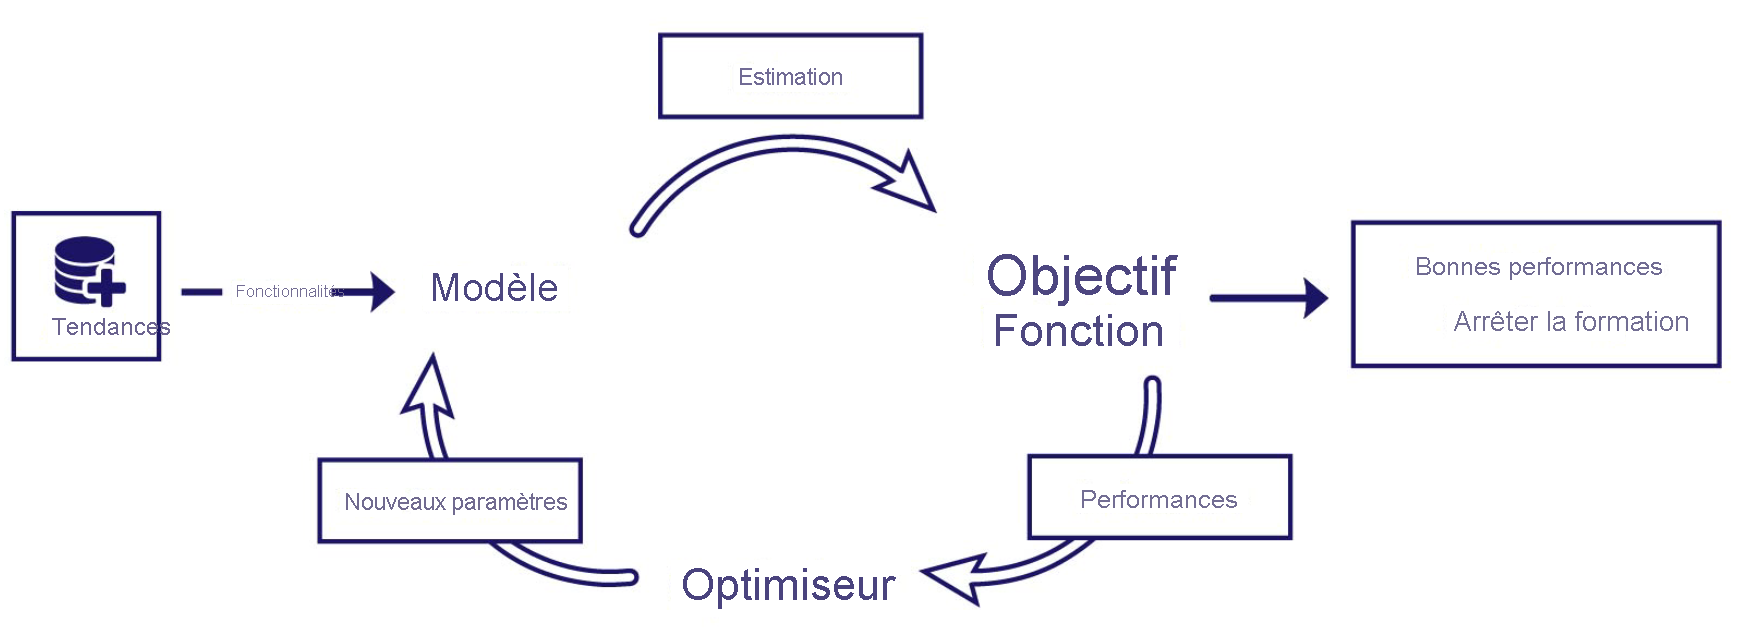

<p class="h2"; style="color:green">Mise en Place de l'environnement</p>

**Import des librairies à utiliser pour la modélisation**

In [1]:
# Import des librairies utiles à l'analyse exploratoire
# **Importation des librairies Python nécessaires**

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Affichage d'un maximum de les lignes et colonnes

pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)

In [71]:
import warnings
warnings.filterwarnings("ignore")

#Librairie standards pour manipulation et visualisations des données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time


#Librairie de Pre-processing (pré-traitement)
from sklearn.preprocessing import LabelEncoder


# Librairie pour modèles de machine learning avec scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Chargement du jeu de données**

In [72]:
# Données nettoyées sans passage au Log des features
#data_cleaned = pd.read_csv("data_cleaned.csv", sep=",").iloc[:, 1:]

# Données nettoyées avec passage au Log des features
#data_log = pd.read_csv("data_log_transform.csv", sep=",").iloc[:, 1:]

# Données nettoyées avec encodage des variables catégorielles
#data_ohc = pd.read_csv("data_ohe.csv", sep=",").iloc[:, 1:]


# Données nettoyées et pré-traitées près pour la modélisation
data_cat = pd.read_csv("data_categoricale.csv", sep=",").iloc[:, 1:]

In [73]:
data = data_cat.copy()
print(data.shape)
data.head()

(1642, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,4.110874,7226362.5,249.98,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,4.127134,8387933.0,295.86,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,3.784190,72587024.0,2089.28,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,4.043051,6794584.0,286.43,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,4.330733,14172606.0,505.01,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


**Choix des critères d'évaluation**

Les métriques que nous allons utiliser pour l'évaluation de nos modèles sont les suivant :

- **R2** : coefficient de détermination
- **MAE** (Mean Absolute Error): l'erreur absolue moyenne
- **RMSE** : Root Mean Squared Error

In [74]:
def data_set_struture(df):
    
    type_of_variable = df.dtypes.value_counts()
    
    Nombre_variables_numeriques = type_of_variable[type_of_variable.index=='float64'][0]+\
                             type_of_variable[type_of_variable.index=='int64'][0]
    
    dict_structure = {"Nombre d'observations" :df.shape[0], "Nombre de variables" :int(df.shape[1]), 
                  'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                  'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                  'Pourcentage de données manquantes':int((df.isnull().sum()/len(df)*100).mean()),
                  'Nombre de doublons':int(len(df[df.duplicated()]))}
    
    structure_df = pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])

    return structure_df 

In [8]:
#data_set_struture(data_cleaned)

In [75]:
#data.select_dtypes(include=["float64","int64"]).columns
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')

### Données avec ENERGYSTARScore Clean

In [76]:
# Cleaning Nan values on the energy_starscore column
data_energy_score = data_cat.copy()
data_energy_score = data_energy_score.dropna(axis=0, how='any', inplace=False)

print("Dataset Shape with ENERGYSTARScore ", data_energy_score.shape)
data_energy_score.head()

Dataset Shape with ENERGYSTARScore  (1088, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,4.110874,7226362.5,249.98,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,4.127134,8387933.0,295.86,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,3.784190,72587024.0,2089.28,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,4.043051,6794584.0,286.43,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,4.330733,14172606.0,505.01,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


## Modélisation 

<p class="h2"; style="color:green">1 - Linear Regression Model </p>

Notre jeu de données initial de taille (1642, 17) a été séparer en deux : 
  - Un Train set de taille => (1149, 17)
  - Un Test set de taille => (493, 17)
               --------------------------------------------------------------------------------



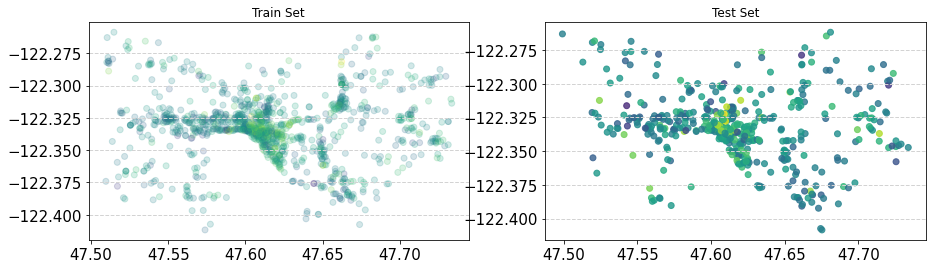

In [79]:
#Import des librairie nécessaire au pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import numpy as np

# Import Data

# Modélisation avec energyStarscore
#df = data_energy_score

# Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())

# Define preprocessing for categorical features (encode them)
#categorical_features = X_data.select_dtypes(include=["object"]).columns
#categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       )



# Diviser le jeu de données en deux
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=104)

print(f"Notre jeu de données initial de taille {X_data.shape} a été séparer en deux : ")
print('  - Un Train set de taille =>', X_train.shape)
print('  - Un Test set de taille =>', X_test.shape)
print("               --------------------------------------------------------------------------------\n")


import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train.values[:, 3], X_train.values[:, 4], c=y_train, alpha=0.2)
plt.title('Train Set')

plt.subplot(1, 2, 2)
plt.scatter(X_test.values[:, 3], X_test.values[:, 4], c=y_test, alpha=0.8)
plt.title('Test Set')
plt.show()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])
--------------------------------------------------------------

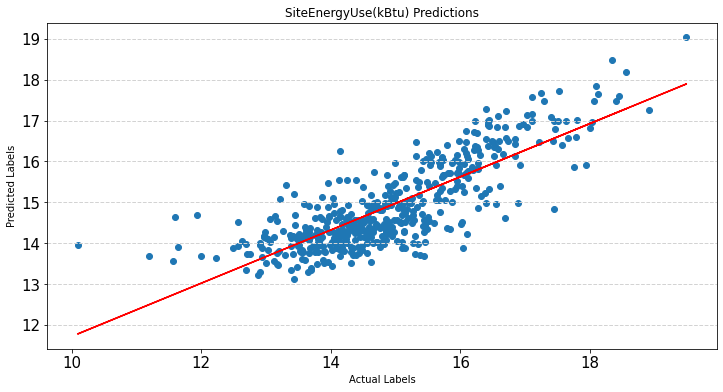

In [80]:
# Entrainement et évaluation d'un modèle de regression linéaaire

from sklearn.linear_model import LinearRegression

#creation du modèle de regression linéaire
Lin_reg_model = make_pipeline(preprocessor, LinearRegression())
Lin_reg_model.fit(X_train, y_train)
print(Lin_reg_model)
print("--------------------------------------------------------------------------------\n")

print("Linear Regresion Model Evaluation ")
print("  - Train score:", Lin_reg_model.score(X_train, y_train))
print("  - Test score:", Lin_reg_model.score(X_test, y_test))
print()


# Predictions and  evaluation metrics 
# Get predictions
y_pred = Lin_reg_model.predict(X_test)

from sklearn import metrics
# Display metrics
print("Lin_Reg. Display Metrics\n")
print("  - MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("  - MSR :", metrics.mean_squared_error(y_test, y_pred))
print("  - RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("  - R2 :", metrics.explained_variance_score(y_test, y_pred))


# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + ' Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

**Coefficients Analysis - coef_**

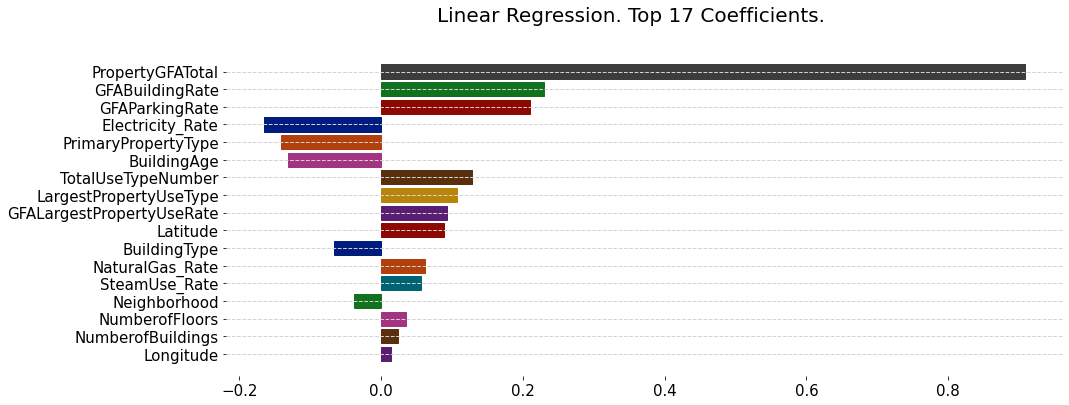

In [81]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

linear_reg_coeff = Lin_reg_model[1].coef_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", 
                        fontsize=20, fontweight="normal")

**Error Analysis**

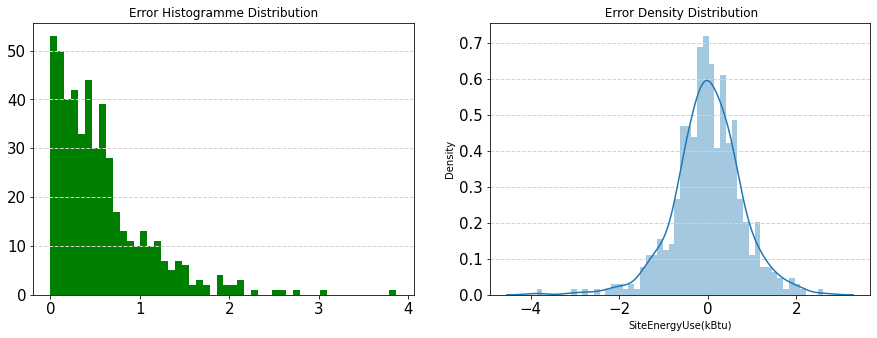

In [82]:
import seaborn as sns

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (15,5))

# calcul du cout (error)
error_hist = np.abs(y_test - y_pred)


# Create a Histogramme on the first axis
ax[0].hist(error_hist, bins=50, color='green')
ax[0].set_title('Error Histogramme Distribution')

# Create a Boxplot of our var on the second axis
#ax[1].boxplot(var_data)
sns.distplot((y_test - y_pred),  bins = 50)
ax[1].set_title(" Error Density Distribution")

plt.show()

[]

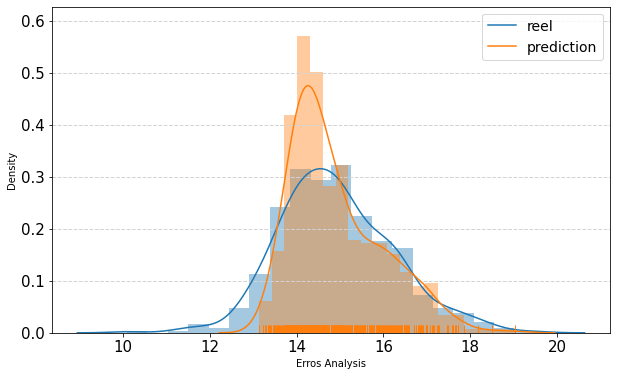

In [83]:
plt.figure(figsize=(10,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.xlabel("Erros Analysis")
plt.legend(['reel', 'prediction'])
plt.plot()

<p class="h2"; style="color:green"> 2 - Gradient Boosting Model </p>

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object'))])),
                ('regressor', GradientBoostingRegressor())]) 

MAE : 0.5025982984416786
MSR : 0.47028452221928957
RSME : 0.685

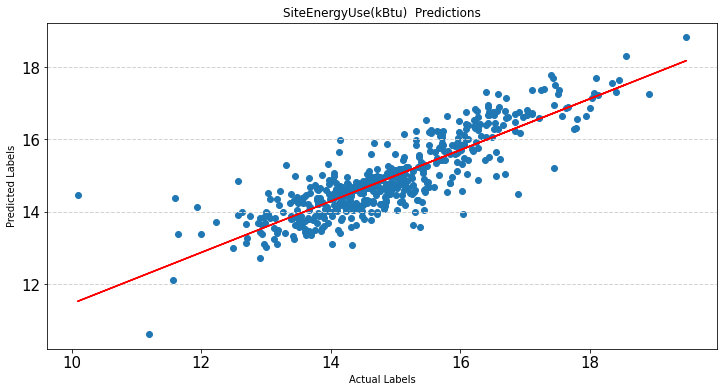

In [84]:
# Entrainement et évaluation d'un modèle de Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor



# Import Data

# Modélisation SANS energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# Modélisation avec energyStarscore
#df = data_energy_score

# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())


# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                     )



# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
y_pred = model.predict(X_test)


# Display metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSR :", metrics.mean_squared_error(y_test, y_pred))
print("RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 :", metrics.explained_variance_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + '  Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

<p class="h2"; style="color:green"> 2 - Random Forest Model </p>

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())]) 

MAE : 0.5125130990902613
MSR : 0.5032388194130476
RSME : 0.70939327

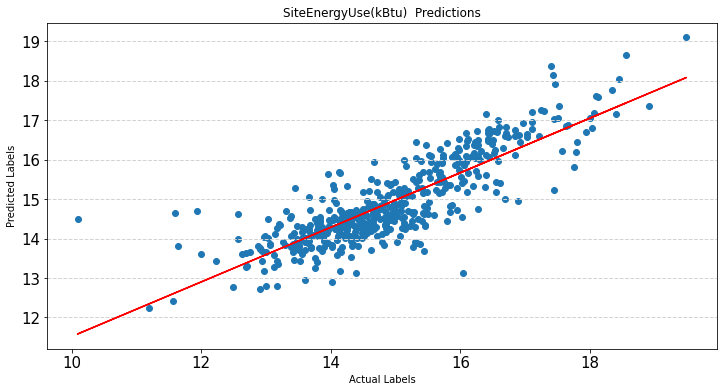

In [85]:
# Entrainement et évaluation d'un modèle de Random Forest
from sklearn.ensemble import RandomForestRegressor


# Import Data

# Modélisation SANS energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# Modélisation avec energyStarscore
#df = data_energy_score


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]


# Define preprocessing for numeric columns (scale them)
numerical_features = X_data.select_dtypes(include=["float64","int64"]).columns
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())


# Define preprocessing for categorical features (encode them)
#categorical_features = X_data.select_dtypes(include=["object"]).columns
#categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())


# Combine preprocessing steps
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      )


# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
y_pred = model.predict(X_test)


# Display metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSR :", metrics.mean_squared_error(y_test, y_pred))
print("RSME :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 :", metrics.explained_variance_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + '  Predictions')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

<p class="h2"; style="color:green"> 3 - Liste des Models Linéaires et Ensembliste </p>

In [94]:
#Import des librairie nécessaire au pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics

import numpy as np
import time

# fonction permettant d'entrainer un model donnnées
def train_model(model, features, target): 
    X = features
    y = target.values
    y=y.astype('int')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Define preprocessing for numeric columns (scale them)
    numerical_features = X.select_dtypes(include=["float64","int64"]).columns
    numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())
    
    
    # Define preprocessing for categorical features (encode them)
    categorical_features = X_data.select_dtypes(include=["object"]).columns
    #categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

    # Combine preprocessing steps
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       )

    
    
    # Use a different estimator in the pipeline
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', model["clf"])])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy =  pipe.score(X_train, y_train)
    test_accuracy = pipe.score(X_test, y_test) 
    
    y_pred = pipe.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
    MAE =  metrics.mean_absolute_error(y_test, y_pred)
    
    model_details = {"name": model["name"],
                     "train_accuracy":train_accuracy,
                     "test_accuracy":test_accuracy, 
                     "RMSE": RMSE,
                     "MAE" : MAE,
                     "train_time": train_time, "model": pipe}
    return model_details

In [95]:
# Import Data


# Modélisation sans energyStarscore
df = data_cat.copy()
df.drop(columns = useles_cols , axis=1, inplace=True)

# Modélisation avec energyStarscore
#df = data_energy_score


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]



# keep track of all details for models we train
trained_models = [] 

models = [
          {"name": "Naive Bayes", "clf": GaussianNB()},
          {"name": "Linear regression", "clf": LinearRegression()}, 
          {"name": "KNeighbors", "clf": KNeighborsRegressor()}, 
          {"name": "Lasso", "clf": Lasso()},
          {"name": "Ridge", "clf": Ridge()},
          {"name": "Decision Tree", "clf": DecisionTreeRegressor()},
          {"name": "Ada Bost", "clf": AdaBoostRegressor()},
          {"name": "Random Forest", "clf": RandomForestRegressor()},
          {"name": "Gradient Boosting", "clf": GradientBoostingRegressor()}
          ]

for model in models:
    model_details = train_model(model, X_data, y_data) 
    trained_models.append(model_details)
trained_models

[{'name': 'Naive Bayes',
  'train_accuracy': 0.17140536149471974,
  'test_accuracy': 0.1362530413625304,
  'RMSE': 2.6002994399906276,
  'MAE': 2.192214111922141,
  'train_time': 0.017470121383666992,
  'model': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('pipeline',
                                                    Pipeline(steps=[('simpleimputer',
                                                                     SimpleImputer()),
                                                                    ('standardscaler',
                                                                     StandardScaler())]),
                                                    Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
         'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
         'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
         'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate

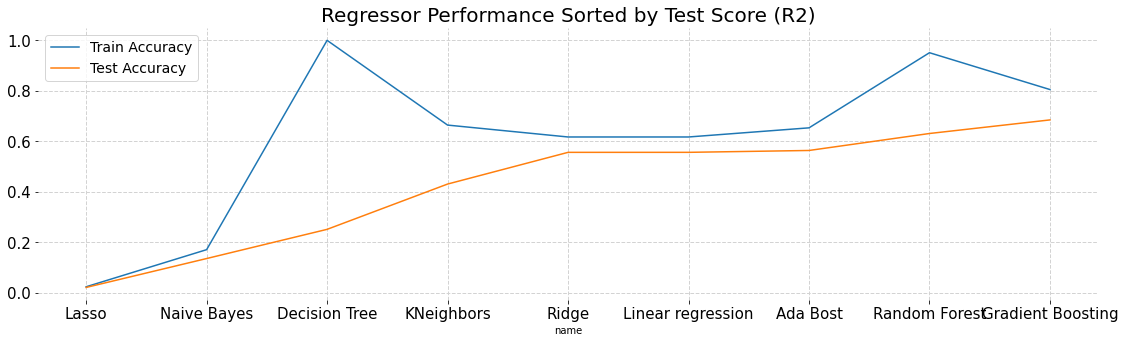

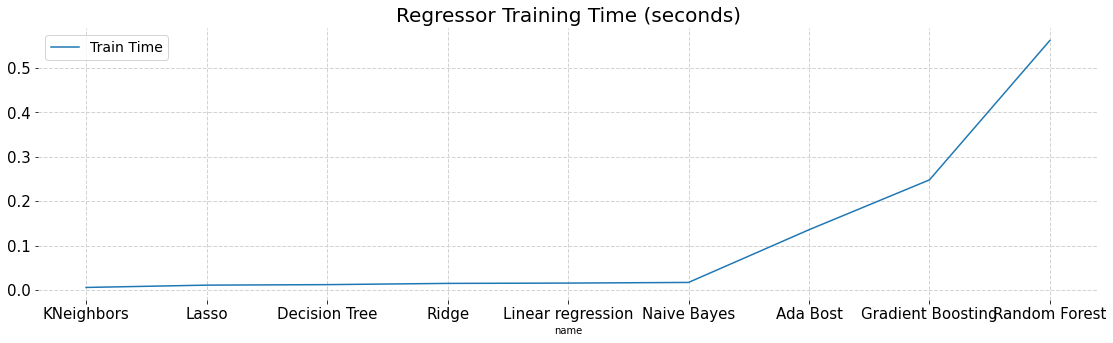

In [97]:
def setup_plot():
    plt.rcParams["axes.grid.axis"] ="y"
    plt.rcParams["axes.grid"] = True
    plt.rcParams["legend.fontsize"] = 14
    plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
    plt.rcParams["xtick.labelsize"] = 15
    plt.rcParams["ytick.labelsize"]  = 15 
    
# visualize accuracy and run time
setup_plot()
model_df = pd.DataFrame(trained_models)
model_df.sort_values("test_accuracy", inplace=True) 
ax = model_df[["train_accuracy","test_accuracy", "name"]].plot(kind="line", x="name", figsize=(19,5), title="Regressor Performance Sorted by Test Score (R2)")
ax.legend(["Train Accuracy", "Test Accuracy"])
for p in ax.patches:
    ax.annotate( str( round(p.get_height(),3) ), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.title.set_size(20)
plt.box(False)

model_df.sort_values("train_time", inplace=True)
ax= model_df[["train_time","name"]].plot(kind="line", x="name", figsize=(19,5), grid=True, title="Regressor Training Time (seconds)")
ax.title.set_size(20)
ax.legend(["Train Time"])
plt.box(False) 

**Plot Tree Models Feature Importance Diagrams**

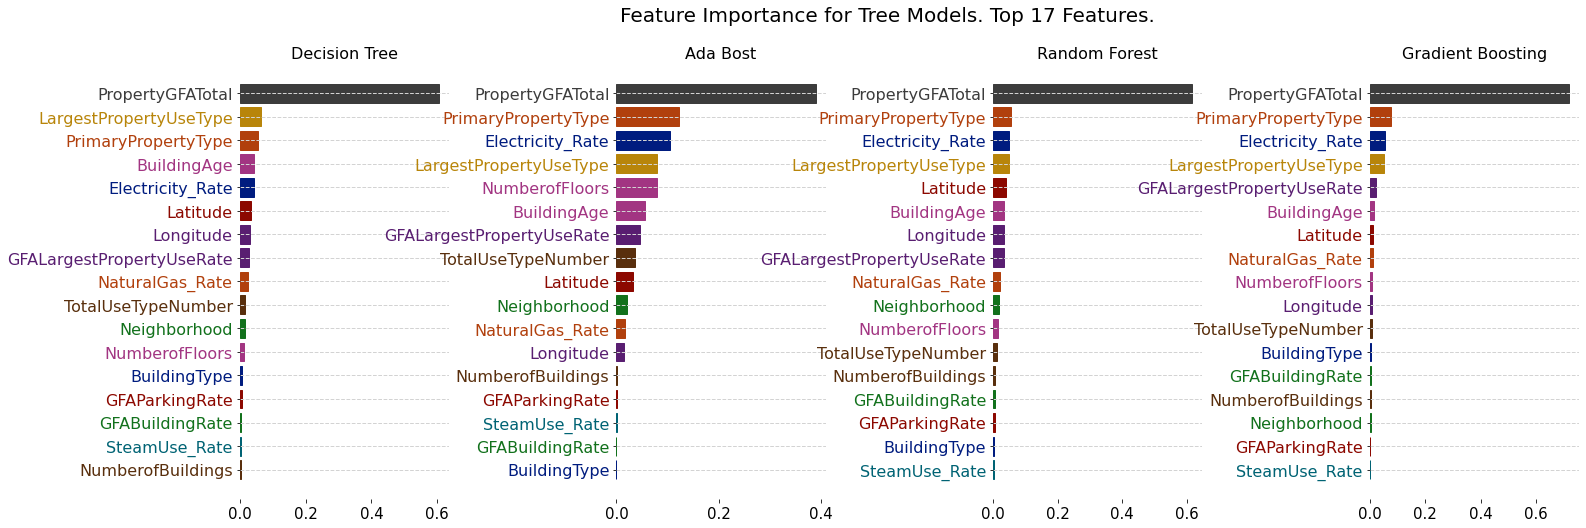

In [98]:
#@title
# Create array of tree based models and plot feature importance scores
tree_models = []

setup_plot()
color_list =  sns.color_palette("dark", len(X_data.columns)) 
top_x = len(X_data.columns) # number of x most important features to show

for model in trained_models:
    if hasattr(model["model"]["clf"], 'feature_importances_'): 
        tree_models.append({"name":model["name"], "fi": model["model"]["clf"].feature_importances_}) 
    
fig, axs = plt.subplots(1,4, figsize=(24, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
axs = axs.ravel()
for i in range(len(tree_models)):
    feature_importance = tree_models[i]["fi"]
    indices = np.argsort(feature_importance)
    indices = indices[-top_x:]

    bars = axs[i].barh(range(len(indices)), feature_importance[indices], color='b', align='center') 
    axs[i].set_title( tree_models[i]["name"], fontweight="normal", fontsize=16)

    plt.sca(axs[i])
    plt.yticks(range(len(indices)), [X_data.columns[j] for j in indices], fontweight="normal", fontsize=16) 

  # print(len(plt.gca().get_yticklabels()), len(indices))
    for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
        ticklabel.set_color(color_list[indices[i]])  

    for i,bar in enumerate(bars):
        bar.set_color(color_list[indices[i]])
    plt.box(False)
    
plt.suptitle("Feature Importance for Tree Models. Top " + str(top_x) + " Features.",
             fontsize=20, fontweight="normal")

plt.show()

**Plot Lineare Models Coeff. Diagrams**

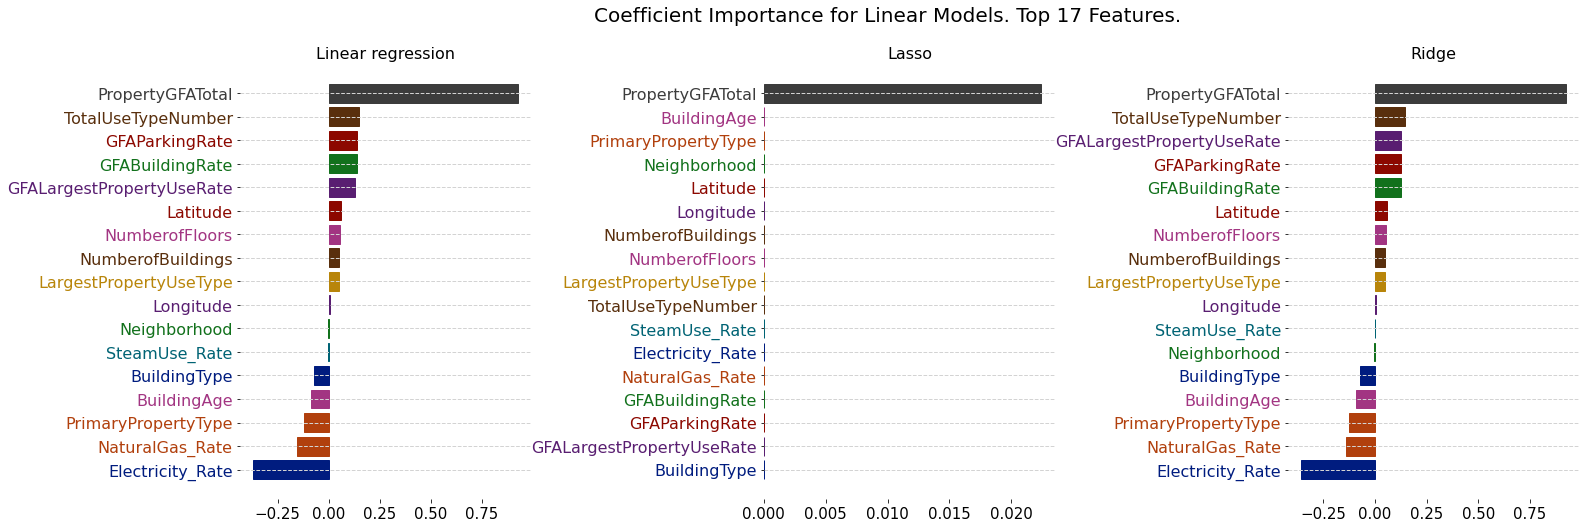

In [99]:
#@title
# Create array of tree based models and plot feature importance scores
linear_models = []

setup_plot()
color_list =  sns.color_palette("dark", len(X_data.columns)) 
top_x = len(X_data.columns) # number of x most important features to show

for model in trained_models:
    if hasattr(model["model"]["clf"], 'coef_'): 
        linear_models.append({"name":model["name"], "fi": model["model"]["clf"].coef_}) 
        
    
fig, axs = plt.subplots(1,3, figsize=(24, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
axs = axs.ravel()

for i in range(len(linear_models)):
    coeff_importance = linear_models[i]["fi"]
    indices = np.argsort(coeff_importance)
    indices = indices[-top_x:]
    
    bars = axs[i].barh(range(len(indices)), coeff_importance[indices], color='b', align='center') 
    axs[i].set_title( linear_models[i]["name"], fontweight="normal", fontsize=16)
    
    plt.sca(axs[i])
    plt.yticks(range(len(indices)), [X_data.columns[j] for j in indices], fontweight="normal", fontsize=16) 

  # print(len(plt.gca().get_yticklabels()), len(indices))
    for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
        ticklabel.set_color(color_list[indices[i]])  

    for i,bar in enumerate(bars):
        bar.set_color(color_list[indices[i]])
    plt.box(False)
    
plt.suptitle("Coefficient Importance for Linear Models. Top " + str(top_x) + " Features.", 
             fontsize=20, fontweight="normal")


plt.show()

**Regression Rigde**

In [23]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline



from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=5)

In [24]:
# Import Data
df = data_cat.copy()

useles_cols = ['ENERGYSTARScore']
df.drop(columns = useles_cols , axis=1, inplace=True)


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]

model = {"name": "Lasso", "clf": Lasso(alpha=4)}

train_model(model, X_data, y_data)

{'name': 'Lasso',
 'train_accuracy': 0.0,
 'test_accuracy': -0.00039600526162164584,
 'RMSE': 1.2969179394495274,
 'MAE': 1.0446494749387774,
 'train_time': 0.006828784942626953,
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('pipeline',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer()),
                                                                   ('standardscaler',
                                                                    StandardScaler())]),
                                                   Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
        'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
        'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
        'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
        'GFALargestPropertyUs

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [26]:
grid.best_score_, grid.best_params_

(0.017661052804285426,
 {'lasso_regression__alpha': 4.0, 'polynomial_features__degree': 3})

## Lasso Modèle Optimisation

In [27]:
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]


# Fixer les valeurs des hyperparamètres à tester
param_grid = [{'alpha' : np.array([10, 1, 0.1, 0.02, 0.01, 0.005, 0.001, 0.0005])}]


# Choisir un score à optimiser 
score = 'r2'


# define the model/ estimator
model = Lasso(normalize=False, random_state=42)

# define the grid search
rfr= GridSearchCV(model, param_grid, scoring=score, cv=5)   

# Optimiser ce régresseur sur le jeu d'entraînement
rfr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rfr.best_params_)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement:")
print(rfr.best_score_)
print(' ')


# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        rfr.cv_results_['mean_test_score'], # score moyen
        rfr.cv_results_['std_test_score'],  # écart-type du score
        rfr.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.001}
 
Meilleur(s) score sur le jeu d'entraînement:
0.7641772889637515
 
Résultats de la validation croisée :
r2 = -0.005 (+/-0.014) for {'alpha': 10.0}
r2 = 0.195 (+/-0.034) for {'alpha': 1.0}
r2 = 0.718 (+/-0.082) for {'alpha': 0.1}
r2 = 0.751 (+/-0.064) for {'alpha': 0.02}
r2 = 0.756 (+/-0.063) for {'alpha': 0.01}
r2 = 0.758 (+/-0.062) for {'alpha': 0.005}
r2 = 0.764 (+/-0.057) for {'alpha': 0.001}
r2 = 0.764 (+/-0.055) for {'alpha': 0.0005}


<p class="h2"; style="color:green">Améliorer des modèles Ensemblistes avec l'Optimisattiondes hyperparamètres </p>

Les modèles simples avec de petits jeux de données peuvent souvent être traités en une seule étape, tandis que les jeux de données plus grands et les modèles plus complexes doivent être ajustés en utilisant à plusieurs reprises le modèle avec les données d’apprentissage et en comparant le résultat à l’étiquette attendue. Si la prédiction est suffisamment précise, nous considérons que le modèle est entraîné. Si ce n’est pas le cas, nous ajustons légèrement le modèle et nous repartons dans la boucle.

- GradientBoostingRegressor

- RandomForestRegressor

- Adaboost

<p class="h3"; style="color:red">Optimisattion Gradient Boosting </p>

skleadoc : https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

interesting doc : https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-quantile-py

In [69]:
# Use a Gradient Boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score



# Import Data
# Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)

# Modélisation avec energyStarscore
#df = data_energy_score


# Target and Features definition 
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]

# Split data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=13)


# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()



# Try these hyperparameter values - -  Fixer les valeurs des hyperparamètres à tester
params = {
    'learning_rate': np.arange(0, 1, 0.1),
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [2, 4, 6],   
    "min_samples_split": [2, 10, 20],
 }


# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.30000000000000004, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50} 

GradientBoostingRegressor(learning_rate=0.30000000000000004, max_depth=4,
                          min_samples_split=10, n_estimators=50) 



In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Import Data



# - Modélisation sans energyStarscore
#df = data_cat.copy()
#df.drop('ENERGYSTARScore' , axis=1, inplace=True)

# - Modélisation avec energyStarscore
df = data_energy_score



# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)


# Target and Features definition 
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]


params = {
    "learning_rate": 0.2,
    "n_estimators": 200,
    "max_depth": 2,
    "min_samples_split": 2,
    "loss": "squared_error",
}
model = {"name": "Gradient Boosting", "clf": GradientBoostingRegressor(**params)}




results = train_model(model, X_data, y_data)
#print(model['clf'].score(X_train, y_train))
#print(model['clf'].score(X_test, y_test))
#print(r2_score(y_test, y_pred))
#print(y_test, model['clf'].predict(X_test))
results

{'name': 'Gradient Boosting',
 'train_accuracy': 1.0,
 'test_accuracy': 1.0,
 'RMSE': 0.0,
 'MAE': 0.0,
 'train_time': 0.04427289962768555,
 'model': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('pipeline',
                                                   Pipeline(steps=[('simpleimputer',
                                                                    SimpleImputer()),
                                                                   ('standardscaler',
                                                                    StandardScaler())]),
                                                   Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
        'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
        'LargestPropertyUseType', 'ENERGYSTARScore', 'SteamUse_Rate',
        'Electricity_Rate', 'NaturalGas_Rate', 'GFABuildingRate',
        'GFAParkingRate', 'GFALargestPropertyUseRate', 'TotalUseTyp

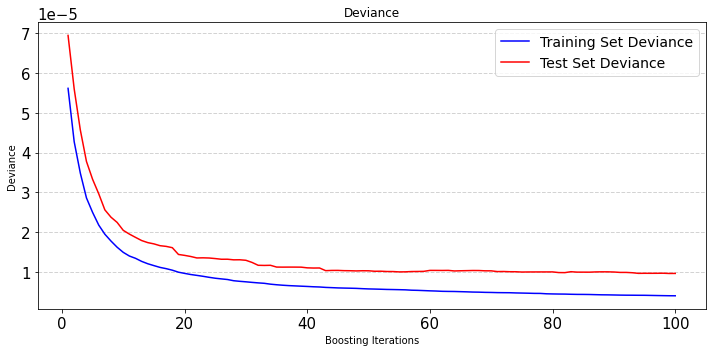

 ------------------------------------------------------------------------------------

Model Metrics : 
  - MAE : 0.0019
  - MSE : 0.0000
  - RMSE: 0.0031
  - R2: 0.899


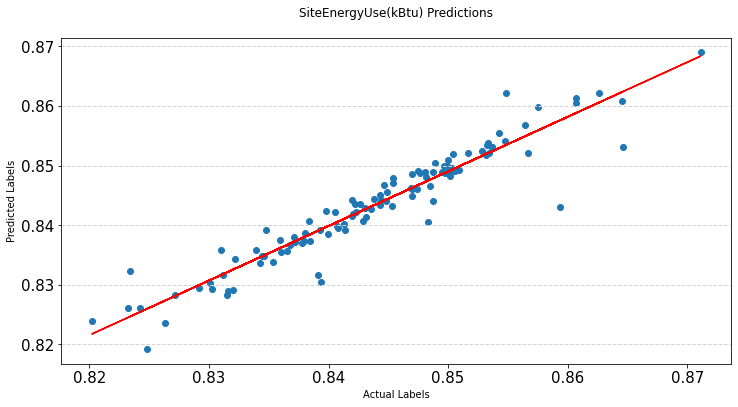

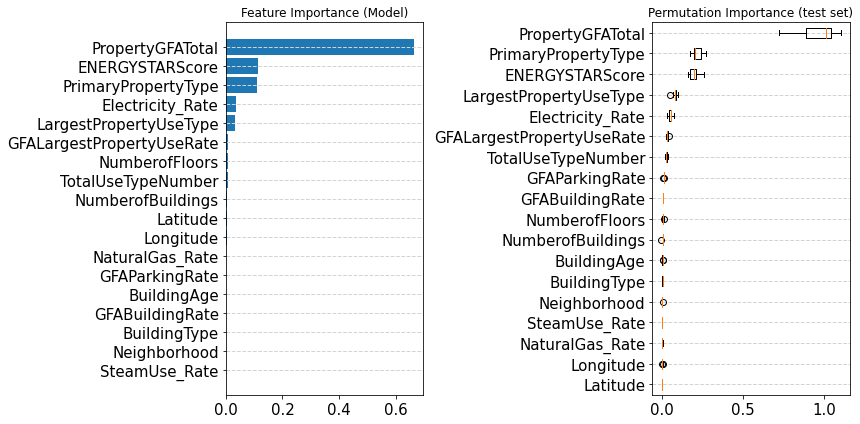

In [68]:
# - Modélisation avec energyStarscore
df = data_energy_score


# Target and Features definition 
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]


X_data = df[features_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=13)

params = {
    "n_estimators": 100,
    "max_depth": 2,
    "min_samples_split": 2,
    "learning_rate": 0.30000000000000004,
    "loss": "squared_error",
}

GB_model = ensemble.GradientBoostingRegressor(**params)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)


# Loss Fonction
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GB_model.staged_predict(X_test)):
    test_score[i] = GB_model.loss_(y_test, y_pred)

fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GB_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


print(" ------------------------------------------------------------------------------------\n")


# Evaluate the model using the test data
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
 

print("Model Metrics : ")
print("  - MAE : {:.4f}".format(mae))
print("  - MSE : {:.4f}".format(mse))
print("  - RMSE: {:.4f}".format(rmse))
print("  - R2: {:.3f}".format(r2))


# Plot predicted vs actual
y_col = 'SiteEnergyUse(kBtu)'

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + ' Predictions\n')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

# Features importances show
feature_importance = GB_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_data.columns)[sorted_idx])
plt.title("Feature Importance (Model)")

result = permutation_importance(
    GB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

<p class="h3"; style="color:red">Optimisattion Random Forest </p>

In [31]:
# - Modélisation avec energyStarscore
df = data_energy_score

# Loading data
X_data = df[features_cols]
y_data = df[y_col]

# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=13)

**Parameters Optmisation - Algo. Random Forest**

In [32]:
# Use a Gradient Boosting algorithm
alg = RandomForestRegressor()


# Try these hyperparameter values - -  Fixer les valeurs des hyperparamètres à tester
params = {
 'n_estimators' : [2, 5, 10, 20, 50],
 'min_samples_split' : [2, 10, 20],
 'min_samples_leaf' : [2, 10, 20],
 'max_depth' : [2, 4, 6, 8, 10, 15, 20, 50],
 'bootstrap' : [True, False]
 }



# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} 

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=50) 



Random Forest Performance:
Train accuracy 0.945245700431899
Test accuracy 0.8355065156473714
--------------------------------

Model Metrics : 
  - MAE : 0.0055
  - MSE : 0.0001
  - RMSE: 0.0092
  - R2: 0.836


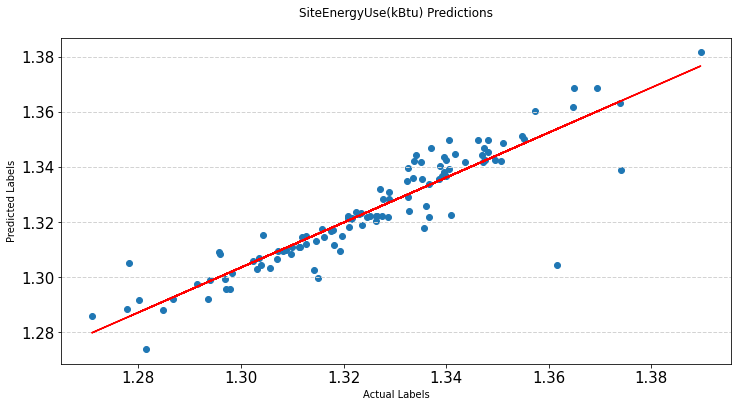

----------------------------------------------------------------------------------


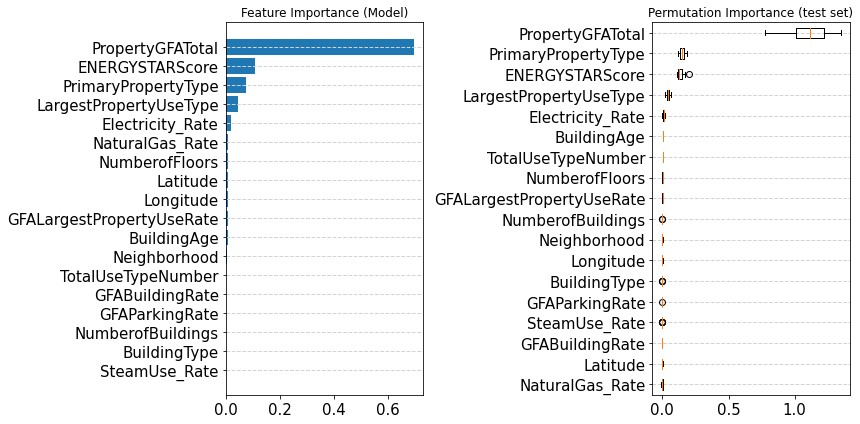

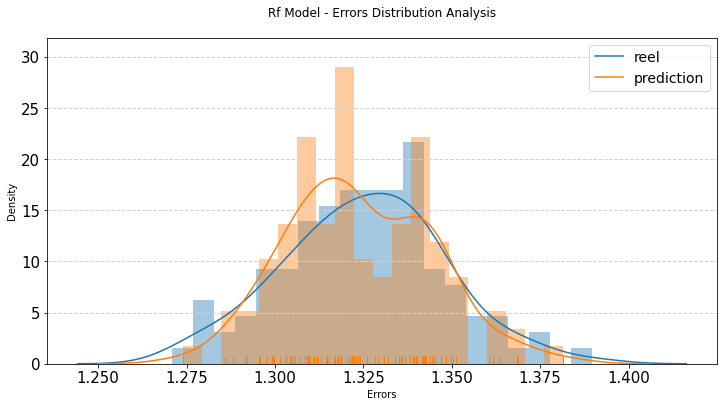

In [33]:
# Train and Evaluate the model 
def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    # Train the model
    model.fit(X_train, y_train)

    # Assess its performance
    # -- Train
    y_pred = model.predict(X_train)
    train_accuracy = r2_score(y_train, y_pred)

    # -- Test
    y_pred = model.predict(X_test)
    test_accuracy = r2_score(y_test, y_pred)

    return train_accuracy, test_accuracy


# Prepare the model and train
rf = RandomForestRegressor(n_estimators=50,
                            max_depth=20,                            
                            min_samples_leaf=2,
                            min_samples_split=10,
                            bootstrap = True,
                            random_state=2, 
                            verbose=False)

# Train and test the result
train_accuracy, test_accuracy = fit_and_test_model(rf)

print("Random Forest Performance:")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

print("--------------------------------\n")

# Evaluate the model using the test data
y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
 

print("Model Metrics : ")
print("  - MAE : {:.4f}".format(mae))
print("  - MSE : {:.4f}".format(mse))
print("  - RMSE: {:.4f}".format(rmse))
print("  - R2: {:.3f}".format(r2))


# Plot predicted vs actual
y_col = 'SiteEnergyUse(kBtu)'

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(y_col + ' Predictions\n')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


print('----------------------------------------------------------------------------------')

# Features Importances
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_data.columns)[sorted_idx])
plt.title("Feature Importance (Model)")

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()



# Error Analysis
plt.figure(figsize=(12,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.title ("Rf Model - Errors Distribution Analysis\n")
plt.xlabel("Errors")
plt.legend(['reel', 'prediction'])
plt.show()

## Modèles Linéaires et Ensemblistes Optimisés

In [34]:
#data_cat.head()

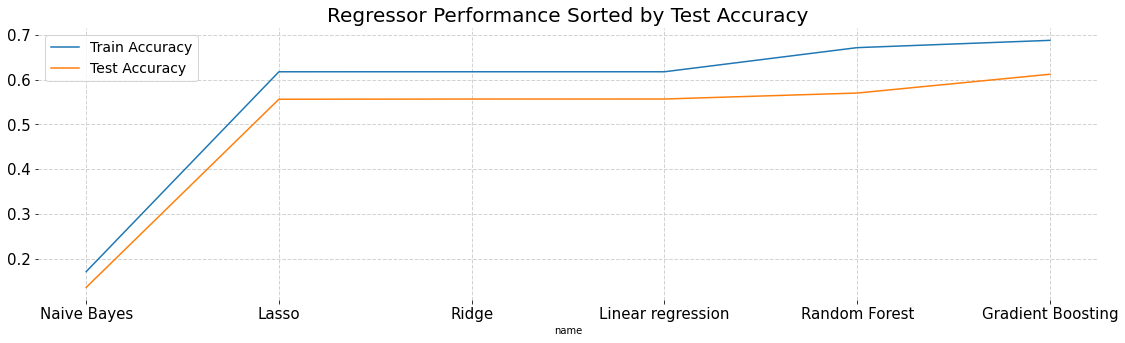

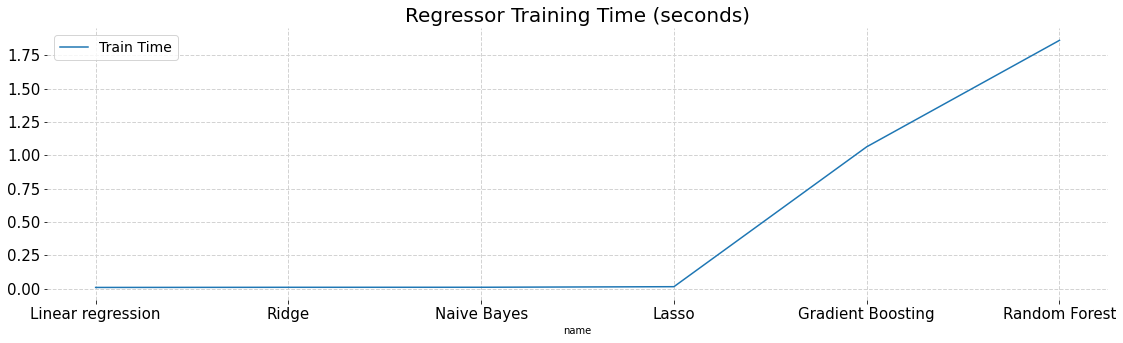

In [35]:
# Import Data

# - Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# - Modélisation avec energyStarscore
#df = data_energy_score


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]
X_data = df[features_cols]
y_data = df[y_col]



# keep track of all details for models we train
trained_models = [] 

models = [ {"name": "Naive Bayes", "clf": GaussianNB()},
          {"name": "Linear regression", "clf": LinearRegression()}, 
          {"name": "Lasso", "clf": Lasso(alpha=0.0005)},
          {"name": "Ridge", "clf": Ridge()},
          {"name": "Random Forest", "clf": RandomForestRegressor(n_estimators=500,
                            max_depth=4,                            
                            min_samples_leaf=2,
                            min_samples_split=2,
                            bootstrap = True,
                            random_state=1, 
                            verbose=False)},
          {"name": "Gradient Boosting", "clf": GradientBoostingRegressor(n_estimators =500,
                                 learning_rate = 0.01,
                                 max_depth=2,
                                 min_samples_split=2,
                                 random_state=1,
                                 loss = "squared_error")}
          ]

for model in models:
    model_details = train_model(model, X_data, y_data) 
    trained_models.append(model_details)
trained_models

def setup_plot():
    plt.rcParams["axes.grid.axis"] ="y"
    plt.rcParams["axes.grid"] = True
    plt.rcParams["legend.fontsize"] = 14
    plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
    plt.rcParams["xtick.labelsize"] = 15
    plt.rcParams["ytick.labelsize"]  = 15 
    
# visualize accuracy and run time
setup_plot()
model_df = pd.DataFrame(trained_models)
model_df.sort_values("test_accuracy", inplace=True) 
ax = model_df[["train_accuracy","test_accuracy", "name"]].plot(kind="line", x="name", figsize=(19,5), title="Regressor Performance Sorted by Test Accuracy")
ax.legend(["Train Accuracy", "Test Accuracy"])
for p in ax.patches:
    ax.annotate( str( round(p.get_height(),3) ), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.title.set_size(20)
plt.box(False)

model_df.sort_values("train_time", inplace=True)
ax= model_df[["train_time","name"]].plot(kind="line", x="name", figsize=(19,5), grid=True, title="Regressor Training Time (seconds)")
ax.title.set_size(20)
ax.legend(["Train Time"])
plt.box(False) 

## Plot individual and voting regression predictions

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. We will use three different regressors to predict the data: GradientBoostingRegressor, RandomForestRegressor, and LinearRegression). Then the above 3 regressors will be used for the VotingRegressor.

Finally, we will plot the predictions made by all models for comparison.

**Model Documentation** : https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html

In [36]:
print(data_cat.shape)
data_cat.head()

(1642, 20)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
0,1,2,3,47.61220,-122.33799,0.693147,2.564949,11.390023,8,4.110874,7226362.5,249.98,0.244748,0.54606,0.17664,0.693147,0.000000,0.693147,0.693147,89
1,1,2,3,47.61317,-122.33393,0.693147,2.484907,11.547974,8,4.127134,8387933.0,295.86,0.000000,0.38661,0.61339,0.617642,0.135798,0.593283,1.386294,20
2,1,2,3,47.61393,-122.33810,0.693147,3.737670,13.770629,8,3.784190,72587024.0,2089.28,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47
3,1,2,3,47.61412,-122.33664,0.693147,2.397895,11.023878,8,4.043051,6794584.0,286.43,0.282099,0.40752,0.26657,0.693147,0.000000,0.693147,0.693147,90
4,1,2,3,47.61375,-122.34047,0.693147,2.944439,12.075856,8,4.330733,14172606.0,505.01,0.000000,0.37880,0.62120,0.498883,0.302413,0.532433,1.386294,36


Text(0.5, 1.0, 'Coefficients de corrélation de Pearson\n')

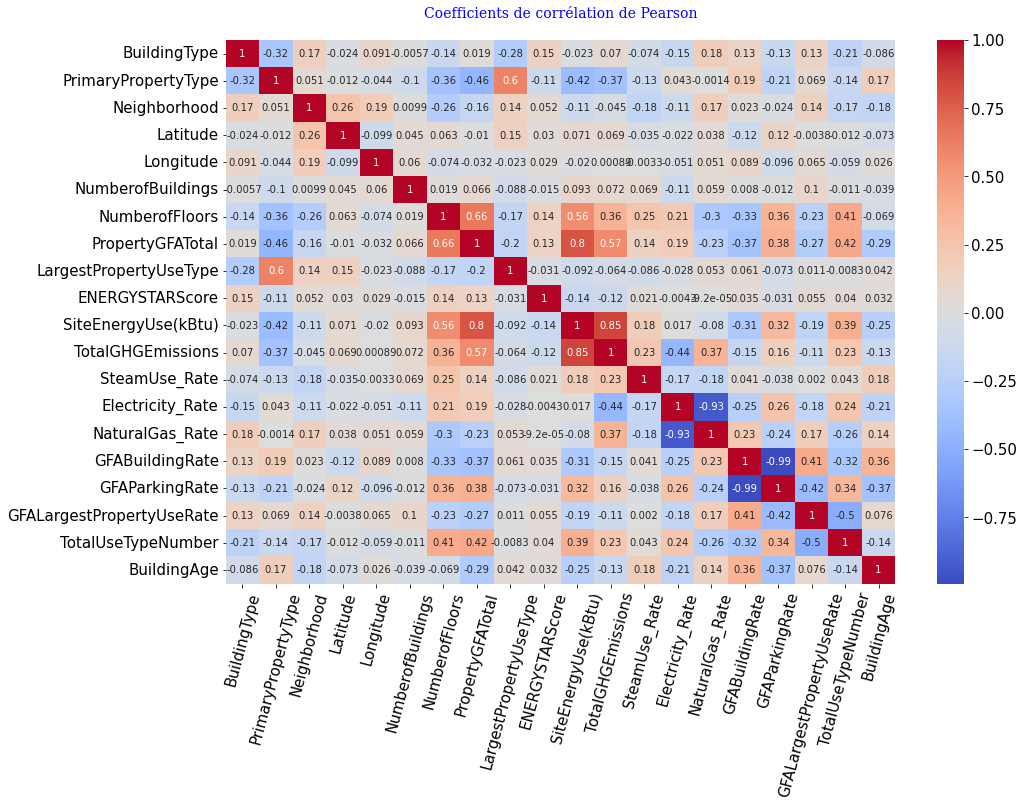

In [37]:
import seaborn as sns

font = {'family': 'serif', 'color':  'blue', 'weight': 'normal','size': 14}

plt.figure(figsize=(15,10))
sns.heatmap(data_energy_score.corr(), annot=True, cmap="coolwarm").set_title('HeatMap')
plt.xticks(rotation=75)
plt.title("Coefficients de corrélation de Pearson\n", fontdict=font)

Voting Regression Model  Metrics : 
  - MAE : 0.4942
  - MSE : 0.4550
  - RMSE: 0.6745
  - R2: 0.717


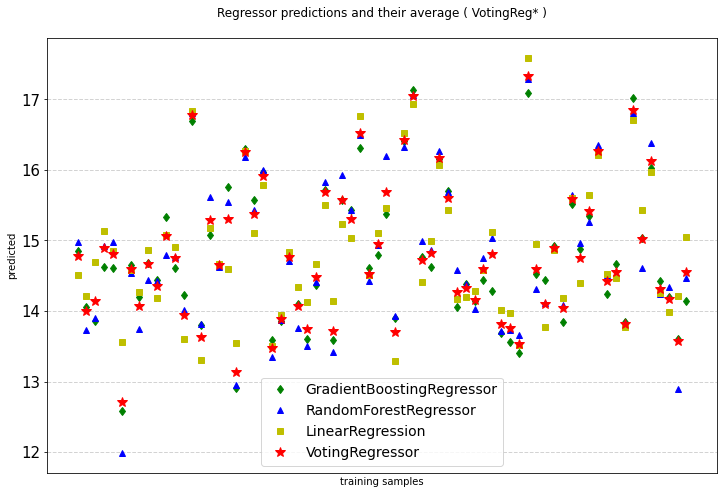

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error


# Import Data

# - Modélisation sans energyStarscore
df = data_cat.copy()
df.drop('ENERGYSTARScore' , axis=1, inplace=True)


# - Modélisation avec energyStarscore
#df = data_energy_score.copy()

# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'SiteEnergyUse(kBtu)'       
features_cols = [col for col in df.columns if col not in target_cols]

    
# Loading data
X_data = df[features_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=13)


# Training classifiers
reg1 = RandomForestRegressor(n_estimators=50,
                            max_depth=20,                            
                            min_samples_leaf=2,
                            min_samples_split=10,
                            bootstrap = True,
                            random_state=1, 
                            verbose=False)

reg2 = GradientBoostingRegressor(n_estimators =100,
                                 learning_rate = 0.30000000000000004,
                                 max_depth=2,
                                 min_samples_split=2,
                                 random_state=1,
                                 loss = "squared_error")
reg3 = LinearRegression()


# Model Training
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

Voting_Reg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
Voting_Reg.fit(X_train, y_train)


# Evaluate the model using the test data
y_pred = Voting_Reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

reel_mae = np.exp(mae)
reel_rmse = np.exp(mse)


print("Voting Regression Model  Metrics : ")
print("  - MAE : {:.4f}".format(mae))
print("  - MSE : {:.4f}".format(mse))
print("  - RMSE: {:.4f}".format(rmse))
print("  - R2: {:.3f}".format(r2))

#print("\n")
#print("L'error moyenne absolue effectué par notre modèle est de : {:.3f}".format(reel_mae))

# sample data
xt = X_test[:70]

# Plotting Predictions
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = Voting_Reg.predict(xt)

plt.figure(figsize=(12, 8))
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average ( VotingReg* )\n")

plt.show()

In [39]:
print("Min target: ", y_train.min())
print("Max target: ", y_train.max())
print("Median target: ", y_train.median())   
print("Mean target: ", y_train.mean())            

Min target:  9.729723300745604
Max target:  19.495992965405236
Median target:  14.764341275002979
Mean target:  14.924110147079679


In [40]:
Voting_Reg.estimators_

[RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=1, verbose=False),
 GradientBoostingRegressor(learning_rate=0.30000000000000004, max_depth=2,
                           random_state=1),
 LinearRegression()]

### Coefficients Analysis

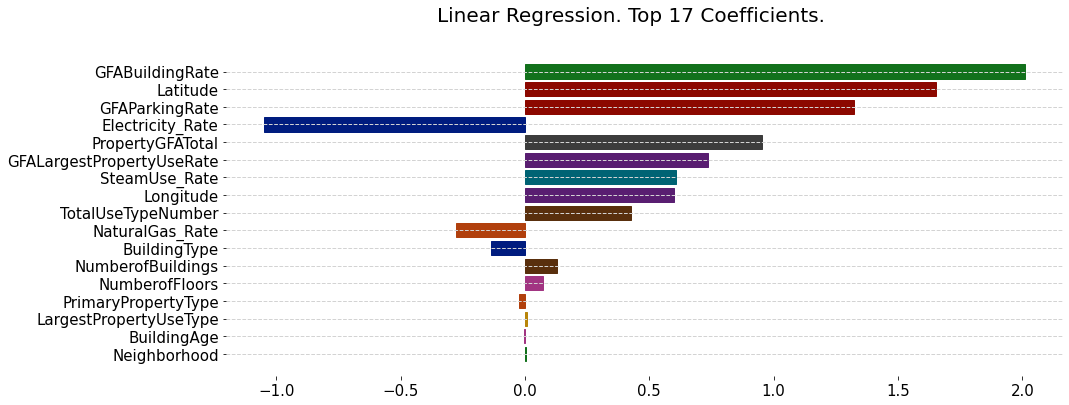

In [41]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

linear_reg_coeff = reg3.coef_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", 
                        fontsize=20, fontweight="normal")

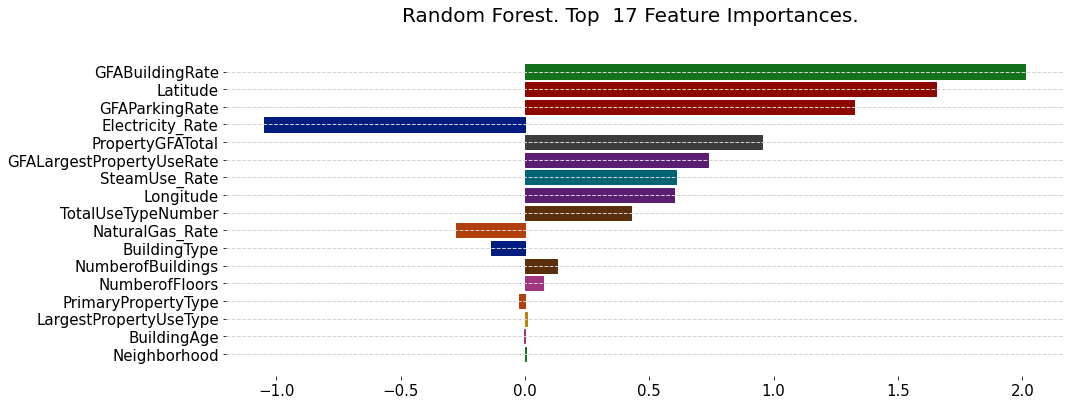

In [42]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

rf_features = reg1.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Random Forest. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")

In [43]:
# len(X_data.columns)

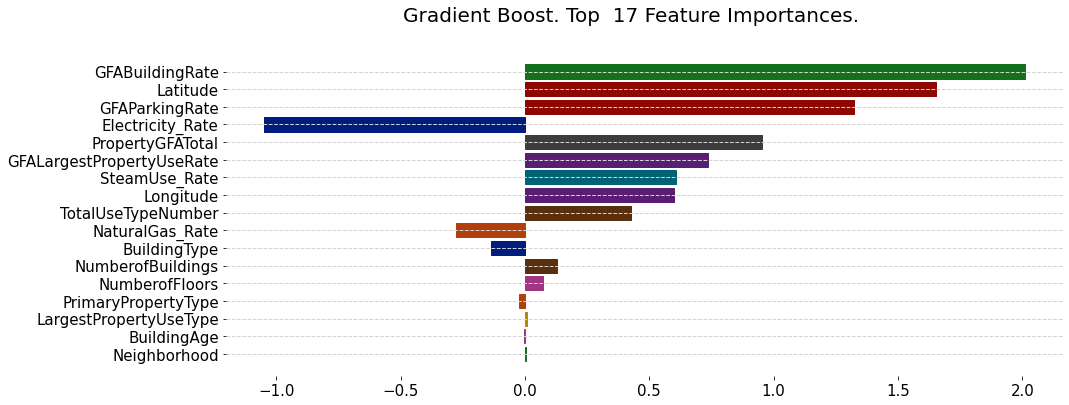

In [44]:
#lm.singular_
#pd.DataFrame(lin_model_coef, X_cols_name, columns=['Coeff']).sort_values(by='Coeff', ascending=False)

gb_features = reg2.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Gradient Boost. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")

In [45]:
#df.head()

## <font color='purple'>Analyse des erreurs de pred. selon les classes des variables catégorielles </font>

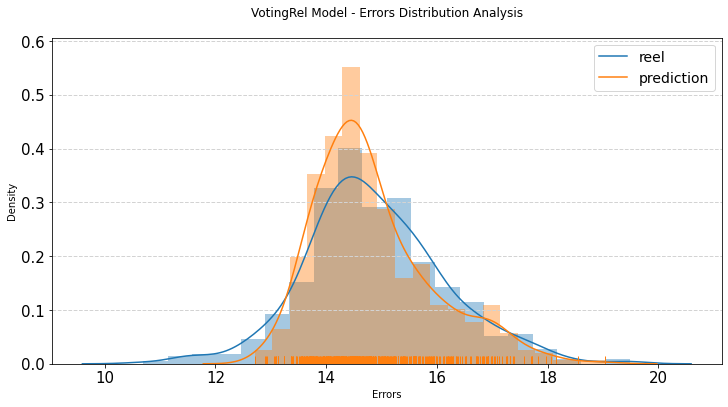

In [46]:
# Error Analysis

y_pred = Voting_Reg.predict(X_test)

plt.figure(figsize=(12,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.title ("VotingRel Model - Errors Distribution Analysis\n")
plt.xlabel("Errors")
plt.legend(['reel', 'prediction'])
plt.show()

In [47]:
print("X_test_Cols : ", X_test.columns)
print("\n")
print("Shape Test set :", X_test.shape)
X_test.head(5)

X_test_Cols :  Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SteamUse_Rate', 'Electricity_Rate',
       'NaturalGas_Rate', 'GFABuildingRate', 'GFAParkingRate',
       'GFALargestPropertyUseRate', 'TotalUseTypeNumber', 'BuildingAge'],
      dtype='object')


Shape Test set : (493, 17)


,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22


In [48]:
#X_test.drop(columns=["y_pred_log", "y_real_log", "y_real", "y_pred", "errors", "abs_errors"], axis=1, inplace=True)

### Modèle Voting Regressor

In [49]:
df_test = pd.DataFrame(X_test, columns=X_test.columns)
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22


In [50]:
#train_set["SalePrice"] = np.exp(y).

In [51]:
df_test["y_pred_log"] = Voting_Reg.predict(X_test)
df_test["y_real_log"] = y_test

In [52]:
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87,14.776664,15.451483
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28,14.002277,14.494599
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87,14.147505,13.953709
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15,14.887933,15.249016
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22,14.811511,15.574193


In [53]:
df_test["y_real"] = np.exp(df_test["y_real_log"])
df_test["y_pred"] = np.exp(df_test["y_pred_log"])
df_test["errors"] = df_test['y_real'] - df_test['y_pred']
df_test["abs_errors"] = abs(df_test['y_real'] - df_test['y_pred'])

In [54]:
df_test.head()

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
1408,2,17,3,47.59986,-122.33195,0.693147,1.609438,10.818818,18,0.071781,0.40762,0.51796,0.693147,0.000000,0.495556,1.098612,87,14.776664,15.451483,5134447.000,2.614710e+06,2.519737e+06,2.519737e+06
934,3,3,2,47.54176,-122.37349,0.693147,1.098612,10.906488,9,0.000000,1.00000,0.00000,0.693147,0.000000,0.690915,0.693147,28,14.002277,14.494599,1972079.625,1.205346e+06,7.667338e+05,7.667338e+05
1278,1,21,0,47.67640,-122.38502,0.693147,1.386294,10.483942,41,0.000000,0.18559,0.81441,0.693147,0.000000,0.593697,1.098612,87,14.147505,13.953709,1148203.250,1.393745e+06,-2.455417e+05,2.455417e+05
809,1,8,6,47.65020,-122.34959,1.791759,1.386294,10.641321,15,0.000000,0.58165,0.41834,0.576287,0.199326,0.293595,1.791759,15,14.887933,15.249016,4193372.000,2.922451e+06,1.270921e+06,1.270921e+06
1132,1,10,5,47.52305,-122.31899,0.693147,1.098612,10.899901,19,0.000000,0.48518,0.51482,0.693147,0.000000,0.693147,0.693147,22,14.811511,15.574193,5804785.500,2.707432e+06,3.097354e+06,3.097354e+06


In [55]:
print("Min target: ", df_test["y_pred"].min())
print("Max target: ", df_test["y_pred"].max())
print("Median target: ", df_test["y_pred"].median())   
print("Mean target: ", df_test["y_pred"].mean())  

Min target:  331651.1740262865
Max target:  186022093.85854024
Median target:  2176693.5777180507
Mean target:  6027205.990652063


In [56]:
df_test_format = df_test.copy()
col_to_format = ['y_real', 'y_pred', "errors"]

# .applymap("{0:.2f}".format)
df_test_format[col_to_format] = df_test_format[col_to_format].applymap("{:,.0f}".format)
df_test_format.sort_values(by="abs_errors", ascending=True).head(10)

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
781,1,3,9,47.67485,-122.29284,0.693147,0.693147,10.051520,9,0.0,0.28514,0.71486,0.693147,0.0,0.693147,0.693147,30,14.351025,14.349378,"1,705,516","1,708,327","-2,810",2810.438946
1632,2,9,7,47.63572,-122.37525,0.693147,0.693147,9.522374,18,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,64,13.137931,13.127687,"502,669","507,845","-5,176",5175.896141
790,1,17,5,47.55316,-122.32616,0.693147,1.098612,10.597384,18,0.0,1.00000,0.00000,0.693147,0.0,0.584682,1.098612,34,14.208506,14.202075,"1,471,915","1,481,412","-9,497",9496.514090
129,3,3,2,47.51778,-122.37074,0.693147,0.693147,10.753596,9,0.0,0.38403,0.61597,0.693147,0.0,0.693147,0.693147,58,14.538216,14.545901,"2,075,892","2,059,999","15,893",15893.054767
1157,1,11,5,47.56680,-122.32149,0.693147,0.693147,10.147257,30,0.0,0.35718,0.64282,0.693147,0.0,0.686857,0.693147,59,14.280673,14.292239,"1,610,796","1,592,273","18,523",18522.626741
1095,1,8,7,47.63034,-122.37412,0.693147,0.693147,10.093984,19,0.0,0.69313,0.30687,0.693147,0.0,0.307499,1.609438,85,13.889209,13.869084,"1,055,034","1,076,482","-21,448",21447.762393
1217,1,20,5,47.52549,-122.33064,0.693147,0.693147,10.219064,17,0.0,0.43163,0.56837,0.693147,0.0,0.700957,0.693147,37,13.958746,13.977921,"1,176,343","1,154,002","22,341",22341.276385
1420,1,17,3,47.60026,-122.32990,0.000000,1.098612,10.423501,18,0.0,1.00000,0.00000,0.693147,0.0,0.594536,0.693147,111,13.912171,13.891116,"1,078,537","1,101,487","-22,950",22949.825571
1160,1,17,8,47.70008,-122.30321,0.693147,1.098612,10.097902,18,0.0,1.00000,0.00000,0.693147,0.0,0.693147,0.693147,42,13.704148,13.732598,"920,432","894,614","25,818",25817.536431
1033,1,10,2,47.53366,-122.33733,0.693147,0.693147,10.054533,31,0.0,0.44648,0.55352,0.693147,0.0,0.446044,1.791759,53,14.275822,14.293052,"1,612,107","1,584,568","27,539",27538.810283


In [57]:
df_test_format.sort_values(by="abs_errors", ascending=True).tail(10)

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,SteamUse_Rate,Electricity_Rate,NaturalGas_Rate,GFABuildingRate,GFAParkingRate,GFALargestPropertyUseRate,TotalUseTypeNumber,BuildingAge,y_pred_log,y_real_log,y_real,y_pred,errors,abs_errors
2,1,2,3,47.613930,-122.338100,0.693147,3.737670,13.770629,8,0.260139,0.68231,0.02058,0.584587,0.187102,0.582897,0.693147,47,17.713546,18.100297,"72,587,025","49,305,482","23,281,543",2.328154e+07
32,1,20,5,47.511380,-122.288750,1.386294,1.098612,13.478773,17,0.000000,1.00000,0.00000,0.693147,0.000000,0.621989,1.386294,55,16.828278,17.616181,"44,731,161","20,343,613","24,387,548",2.438755e+07
214,1,5,3,47.605490,-122.333190,0.693147,3.637586,13.866650,18,0.000000,1.00000,0.00000,0.611818,0.145156,0.546502,2.484907,14,18.066480,17.534278,"41,213,585","70,173,401","-28,959,816",2.895982e+07
291,1,8,6,47.619150,-122.348570,0.693147,1.945910,12.843823,27,0.000000,0.97155,0.02845,0.425627,0.384888,0.360628,1.945910,15,16.929930,17.824172,"55,073,121","22,520,344","32,552,777",3.255278e+07
215,1,5,3,47.606160,-122.331650,0.693147,3.761200,13.333734,18,0.012620,0.98730,0.00000,0.543690,0.245022,0.663466,1.609438,43,17.373528,18.057122,"69,519,809","35,093,559","34,426,250",3.442625e+07
577,1,17,2,47.541030,-122.337660,0.693147,1.386294,11.351900,18,0.000000,0.49036,0.01805,0.693147,0.000000,0.671775,0.693147,87,15.067315,17.451825,"37,951,709","3,496,647","34,455,062",3.445506e+07
1299,0,19,7,47.650190,-122.361730,2.708050,1.098612,13.193755,2,0.000000,0.24963,0.75037,0.693147,0.000000,0.690188,0.693147,71,17.830456,18.322071,"90,609,641","55,420,282","35,189,359",3.518936e+07
964,0,19,4,47.610650,-122.317110,0.693147,1.098612,14.603968,2,0.000000,0.53793,0.46207,0.693147,0.000000,0.577546,1.098612,77,18.156831,18.557382,"114,648,521","76,808,928","37,839,593",3.783959e+07
593,1,1,4,47.608951,-122.322402,2.079442,2.708050,14.384211,7,0.380318,0.47787,0.05938,0.693147,0.000000,0.656634,1.098612,22,19.041376,19.490943,"291,614,433","186,022,094","105,592,339",1.055923e+08
116,1,1,9,47.662310,-122.281460,1.945910,2.397895,13.686541,7,0.000000,0.45558,0.54442,0.693147,0.000000,0.693147,0.693147,63,18.552285,19.352185,"253,832,465","114,065,737","139,766,728",1.397667e+08


In [58]:
df_test_format[["PrimaryPropertyType", "Neighborhood" , "BuildingAge","y_real", "y_pred", "errors"]].head()

,PrimaryPropertyType,Neighborhood,BuildingAge,y_real,y_pred,errors
1408,17,3,87,"5,134,447","2,614,710","2,519,737"
934,3,2,28,"1,972,080","1,205,346","766,734"
1278,21,0,87,"1,148,203","1,393,745","-245,542"
809,8,6,15,"4,193,372","2,922,451","1,270,921"
1132,10,5,22,"5,804,785","2,707,432","3,097,354"


In [59]:
describe = df_test.describe().T
col_syle = ['count', 'mean', 'min', 'max',  'std', '25%', '50%', '75%']

# .applymap("{0:.2f}".format)
describe[col_syle] = describe[col_syle].applymap("{:,.0f}".format)
describe.tail(4)

,count,mean,std,min,25%,50%,75%,max
y_real,493,"7,502,930","20,588,214","44,295","1,298,309","2,586,117","6,361,238","291,614,433"
y_pred,493,"6,027,206","13,251,127","331,651","1,303,266","2,176,694","4,792,296","186,022,094"
errors,493,"1,475,724","9,499,899","-28,959,816","-576,541","123,038","1,274,241","139,766,728"
abs_errors,493,"3,048,172","9,117,019","2,810","352,759","811,450","2,636,702","139,766,728"


#### <font color='darkcyan'>Building Type</font>

In [60]:
df_test['BuildingType'].value_counts()

1    434
3     28
2     25
0      6
Name: BuildingType, dtype: int64

In [61]:
df_buildingType = df_test[['BuildingType', 'errors']].groupby('BuildingType').mean()
df_buildingType

,errors
BuildingType,
0,1.639764e+07
1,1.345175e+06
2,2.327448e+06
3,-4.587958e+05


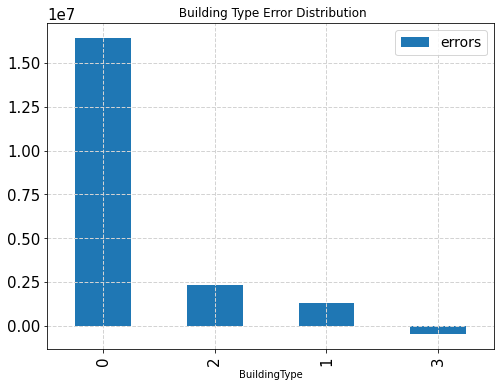

In [62]:
#fig, ax = plt.subplots(figsize=(10, 7))

df_buildingType.sort_values('errors',ascending=False).plot(figsize=(8, 6), kind='bar')
plt.title(" Building Type Error Distribution")
plt.show()

#### <font color='darkcyan'>Primary Property Type</font>

In [63]:
df_property_type = df_test[['PrimaryPropertyType', 'errors']].groupby('PrimaryPropertyType').mean()
df_property_type.sort_values('errors',ascending=False)
df_property_type

,errors
PrimaryPropertyType,
0,-1.924211e+05
1,6.412242e+07
2,1.476061e+06
3,-1.917340e+05
4,8.056973e+06
5,-6.545259e+05
6,-2.047853e+06
7,4.289092e+06
8,1.292070e+06


[]

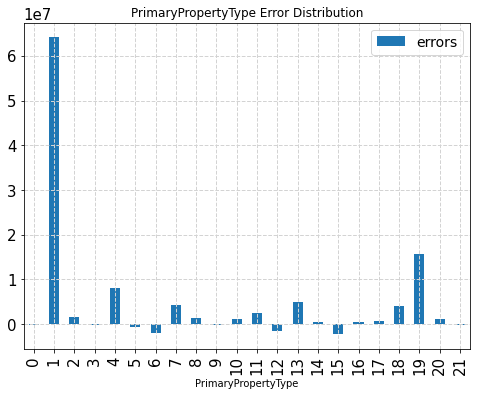

In [64]:
df_property_type.plot(figsize=(8, 6), kind='bar')
plt.title("PrimaryPropertyType Error Distribution")
plt.plot()

#### <font color='darkcyan'>Primary Property Type</font>

[]

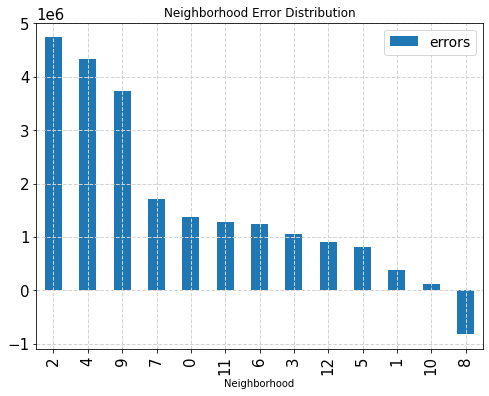

In [65]:
df_neighborhood = df_test[['Neighborhood', 'errors']].groupby('Neighborhood').mean()

df_neighborhood.sort_values('errors',ascending=False).plot(figsize=(8, 6), kind='bar')
plt.title("Neighborhood Error Distribution")
plt.plot()

## Total GHE Emissions Predictions

Voting Regression Model  Metrics : 
  - MAE : 0.0162
  - MSE : 0.0007
  - RMSE: 0.0263
  - R2: 0.867


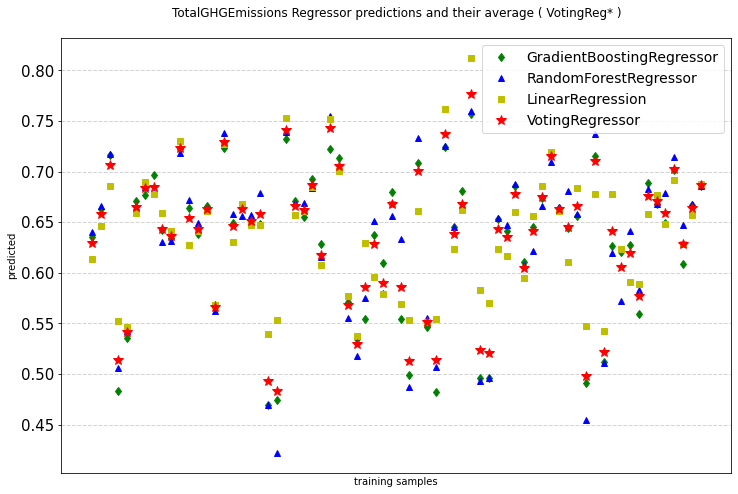

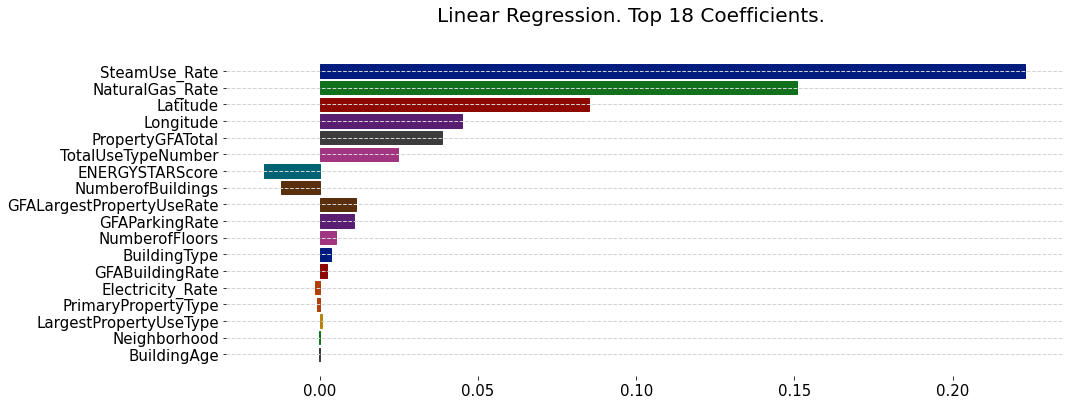

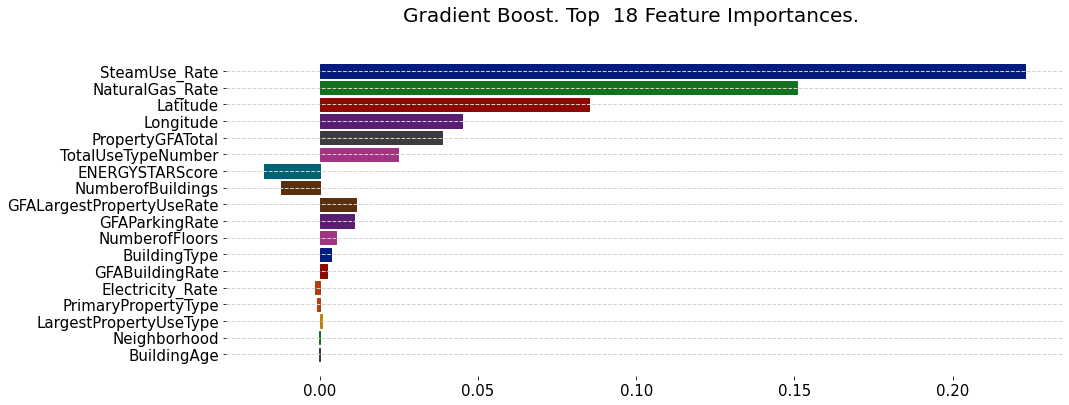

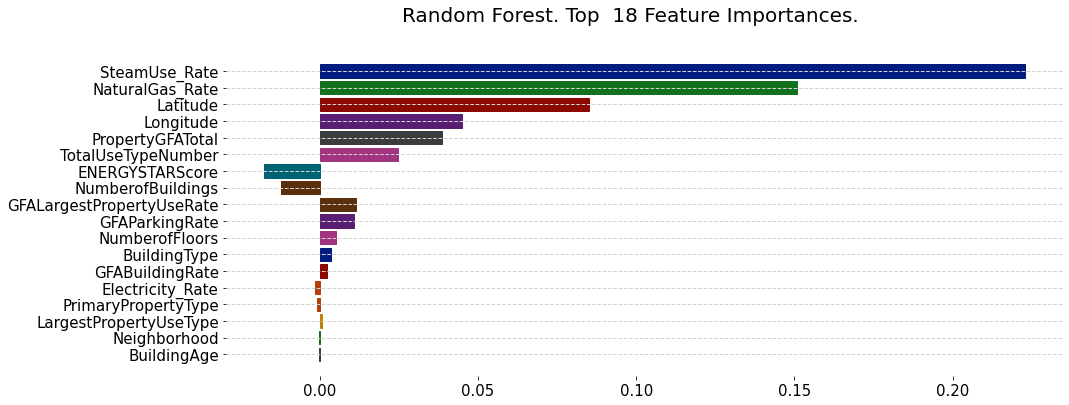

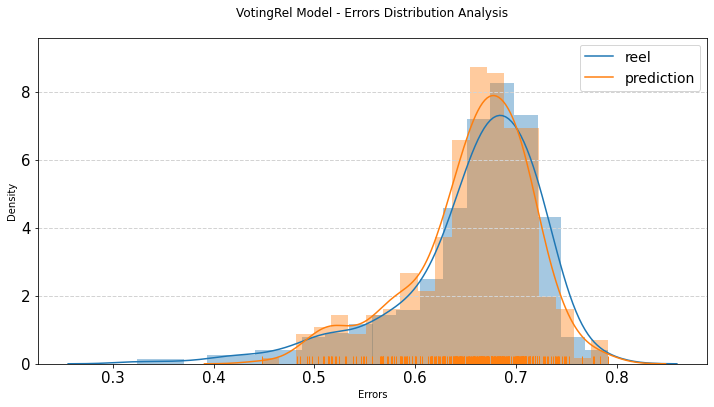

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error


# Import Data
#df = data_cat.copy()
#df.drop('ENERGYSTARScore', axis=1, inplace=True)

data_energy_score.dropna(axis=0, how='any', inplace=False)
df = data_energy_score.copy()


# Perform the skew transformation just on targets 
target_cols = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
for col in target_cols:
    df[col] = df[col].apply(np.log1p)

    
y_col = 'TotalGHGEmissions'       
features_cols = [col for col in df.columns if col not in target_cols]

    
# Loading data
X_data = df[features_cols]
y_data = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=13)


# Training classifiers
reg1 = RandomForestRegressor(n_estimators=50,
                            max_depth=20,                            
                            min_samples_leaf=2,
                            min_samples_split=10,
                            bootstrap = True,
                            random_state=1, 
                            verbose=False)

reg2 = GradientBoostingRegressor(n_estimators =100,
                                 learning_rate = 0.30000000000000004,
                                 max_depth=2,
                                 min_samples_split=2,
                                 random_state=1,
                                 loss = "squared_error")
reg3 = LinearRegression()


# Model Training
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

Voting_Reg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
Voting_Reg.fit(X_train, y_train)


# Evaluate the model using the test data
y_pred = Voting_Reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

reel_mae = np.exp(mae)
reel_rmse = np.exp(mse)


print("Voting Regression Model  Metrics : ")
print("  - MAE : {:.4f}".format(mae))
print("  - MSE : {:.4f}".format(mse))
print("  - RMSE: {:.4f}".format(rmse))
print("  - R2: {:.3f}".format(r2))

#print("\n")
#print("L'error moyenne absolue effectué par notre modèle est de : {:.3f}".format(reel_mae))

# sample data
xt = X_test[:70]

# Plotting Predictions
pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = Voting_Reg.predict(xt)

plt.figure(figsize=(12, 8))
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title(y_col + " Regressor predictions and their average ( VotingReg* )\n")


## Linear_reg. coeff analysis
linear_reg_coeff = reg3.coef_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Linear Regression. Top " + str(top_x) + " Coefficients.", 
                        fontsize=20, fontweight="normal")


## Gradient Boosting Feature Importances 
gb_features = reg2.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Gradient Boost. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")



## Random Forest Features Importances
rf_features = reg1.feature_importances_
X_cols_name = X_data.columns
color_list =  sns.color_palette("dark", len(X_data.columns)) 

plt.figure(figsize=(15,6))
top_x = len(X_data.columns)
idx = np.argsort(np.abs(linear_reg_coeff))[::-1] 
lreg_ax = plt.barh(X_data.columns[idx[:top_x]][::-1], linear_reg_coeff[idx[:top_x]][::-1])

for i,bar in enumerate(lreg_ax):
    bar.set_color(color_list[idx[:top_x][::-1][i]])
    plt.box(False) 
lr_title = plt.suptitle("Random Forest. Top  " + str(top_x) + " Feature Importances.", 
                        fontsize=20, fontweight="normal")



# Error Analysis

y_pred = Voting_Reg.predict(X_test)

plt.figure(figsize=(12,6))
plt.title('', fontsize=18, fontweight="bold")
sns.distplot(y_test, bins=20, rug=False)
sns.distplot(y_pred, bins = 20, rug=True)
plt.title ("VotingRel Model - Errors Distribution Analysis\n")
plt.xlabel("Errors")
plt.legend(['reel', 'prediction'])
plt.show()


plt.show()